# <font color = #119fbf> **Trabalho 1 - Análise Exploratória**</font>

* Graduação em Engenharia de Computação
* Introdução à Ciências de Dados
* UFC Campus Sobral – 2024.1


## Equipe 04:


1.   Iris Cordeiro Costa - 497503
2.   Isac Andrade Alves - 493787
3.   Ismael Soares da Silva - 476051
4.   Israel da Silva Pereira - 497145
5.   Izaias Machado Pessoa Neto - 497372
6.   Joana Sthefanny Gomes Costa dos Santos - 470890













In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import gdown

Para que não seja necessário salvar o arquivo no Google Drive da pessoa que está executando, optou-se por baixar o *dataset* diretamente nesse Notebook utilizando o link de compartilhamento.

In [ ]:
# URL do Google Drive com o ID do arquivo
url = 'https://drive.google.com/uc?export=download&id=1GSwD5nciOeB0mtQGKXzrpXgVwY9ms-Py'
output = 'data_cts_intentional_homicide.xlsx'

# Baixar o arquivo
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GSwD5nciOeB0mtQGKXzrpXgVwY9ms-Py
To: /content/data_cts_intentional_homicide.xlsx
100%|██████████| 6.87M/6.87M [00:00<00:00, 22.5MB/s]


'data_cts_intentional_homicide.xlsx'

O *dataset* é carregado e são exibidas algumas linhas

In [ ]:
homicidios = pd.read_excel('/content/data_cts_intentional_homicide.xlsx')
homicidios.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,35.00,CTS
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,28.00,CTS
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,15053.00,CTS
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,69.00,CTS
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,455.00,CTS


A seguir, são exibidos os nomes e tipos de cada uma das colunas

In [ ]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113634 entries, 0 to 113633
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            113634 non-null  object 
 1   Country              113634 non-null  object 
 2   Region               113634 non-null  object 
 3   Subregion            113634 non-null  object 
 4   Indicator            113634 non-null  object 
 5   Dimension            113634 non-null  object 
 6   Category             113634 non-null  object 
 7   Sex                  113634 non-null  object 
 8   Age                  113634 non-null  object 
 9   Year                 113634 non-null  int64  
 10  Unit of measurement  113634 non-null  object 
 11  VALUE                113634 non-null  float64
 12  Source               113634 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.3+ MB


Para esse trabalho, convencionou-se utilizar somente dados **a partir de 2013**

In [ ]:
homicidios = homicidios[homicidios['Year'] >= 2013]
homicidios.shape

(82378, 13)

## 1. Quais países apresentam as 10 maiores índices de homicídios nos últimos 5 anos?

#### Para identificar os países com os maiores índices de homicídios nos últimos 5 anos, primeiro filtramos os dados do dataset para os anos a partir de 2018. Em seguida, excluímos as estimativas baseadas em dados nacionais e mantivemos apenas as medições de taxa por 100.000 habitantes para o total da população. Após agrupar e calcular a média dos índices de homicídios por país, classificamos os dados de forma decrescente e selecionamos os 10 países com as maiores médias de homicídios. Os resultados foram visualizados em um gráfico de barras horizontal apresentado abaixo.

In [ ]:
ultimos_5_anos = homicidios[homicidios['Year'] >= 2018]

ultimos_5_anos = ultimos_5_anos[~ultimos_5_anos['Source'].isin(['UNODC estimate based on national data'])]

ultimos_5_anos = ultimos_5_anos[ultimos_5_anos['Unit of measurement'] == 'Rate per 100,000 population']

ultimos_5_anos = ultimos_5_anos[ultimos_5_anos['Sex'] == 'Total']  #implica em 'Age' == 'Total'

ultimos_5_anos = ultimos_5_anos[ultimos_5_anos['Category']=='Total'] #implica em 'Dimension' == 'Total'

# Configura o Pandas para exibir números com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)


In [ ]:
# Agrupa e classifica os dados
homicidios_por_pais = ultimos_5_anos.groupby('Country')['VALUE'].mean().reset_index()
homicidios_por_pais = homicidios_por_pais.sort_values(by='VALUE', ascending=False)

# Seleciona os 10 países com os maiores índices de homicídios
top_10_paises = homicidios_por_pais.head(10)

# Exibe resultados
print("\nTop 10 países com os maiores índices de homicídios nos últimos 5 anos (Taxa por 100.000 habitantes(Média)):")
top_10_paises


Top 10 países com os maiores índices de homicídios nos últimos 5 anos (Taxa por 100.000 habitantes(Média)):


,Country,VALUE
129,South Africa,35.78
154,Venezuela (Bolivarian Republic of),25.16
139,Trinidad and Tobago,23.93
23,Brazil,22.77
120,Saint Vincent and the Grenadines,21.86
99,Nigeria,21.74
70,Jamaica,21.27
17,Belize,20.92
44,El Salvador,19.70
111,Puerto Rico,18.64


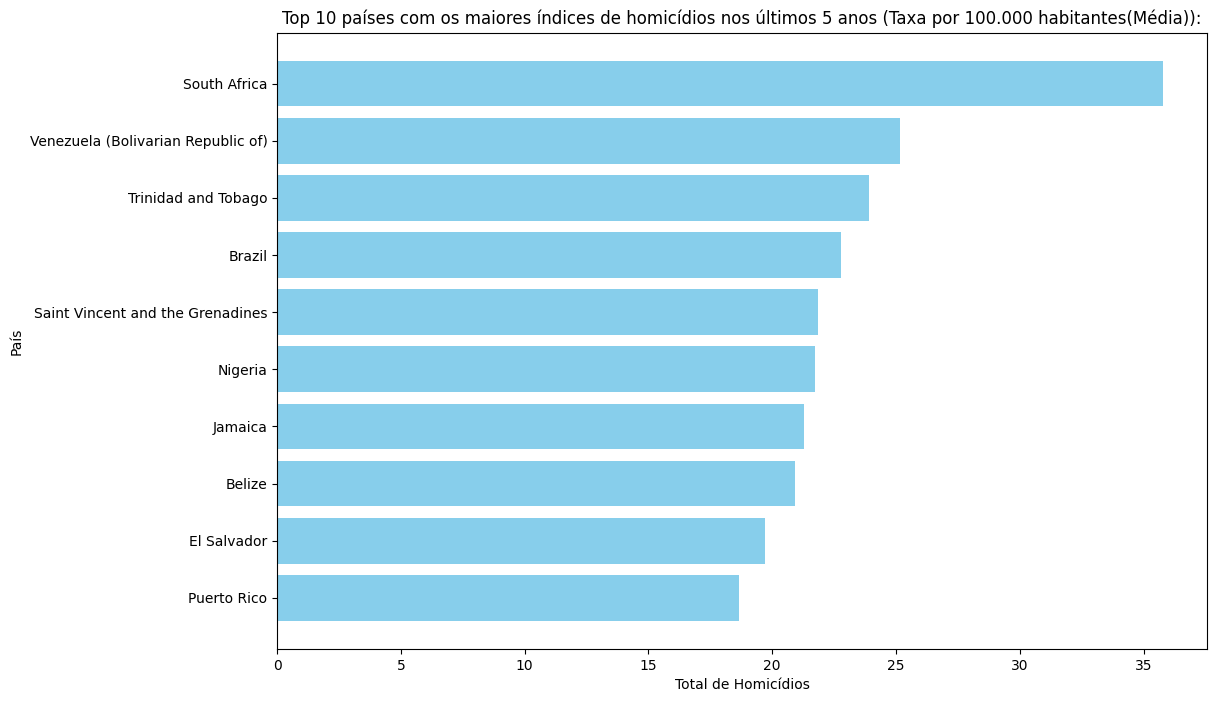

In [ ]:
# Plota gráfico de barras dos 10 países com os maiores índices de homicídios
plt.figure(figsize=(12, 8))
plt.barh(top_10_paises['Country'], top_10_paises['VALUE'], color='skyblue')
plt.xlabel('Total de Homicídios')
plt.ylabel('País')
plt.title('Top 10 países com os maiores índices de homicídios nos últimos 5 anos (Taxa por 100.000 habitantes(Média)):')
plt.gca().invert_yaxis()
plt.show()

## 2. Quais países apresentam os 10 maiores índices de homicídios de mulheres em 2022?

#### Para determinar os países com os maiores índices de homicídios de mulheres em 2022, filtramos os dados para esse ano específico. Removemos estimativas baseadas em dados nacionais e focamos na taxa de homicídios por 100.000 habitantes para mulheres de todas as idades. Classificamos os países de forma decrescente com base nos índices de homicídios e selecionamos os 10 com as maiores taxas. Os resultados foram apresentados em um gráfico de barras horizontal, destacando os países mais perigosos para mulheres em 2022.

In [ ]:
# Filtra os dados para o ano de 2022
dados_2022 = homicidios[homicidios['Year'] == 2022]

dados_2022 = dados_2022[~dados_2022['Source'].isin(['UNODC estimate based on national data'])]

dados_2022_counts = dados_2022[dados_2022['Unit of measurement'] == 'Rate per 100,000 population']

dados_2022_counts = dados_2022_counts[dados_2022_counts['Age'] == 'Total']

dados_mulheres = dados_2022_counts[dados_2022_counts['Sex'] == 'Female']

dados_mulheres = dados_mulheres[dados_mulheres['Category']=='Total'] #implica em 'Dimension' == 'Total'

In [ ]:
# Classifica os países pelos índices totais de homicídios de mulheres de forma decrescente
homicidios_mulheres_por_pais = dados_mulheres.sort_values(by='VALUE', ascending=False)

# Seleciona os 10 países com os maiores índices de homicídios de mulheres
top_10_paises_mulheres = homicidios_mulheres_por_pais[['Country', 'VALUE']].head(10)

# Exibe os resultados
print("\nTop 10 países com os maiores índices de homicídios de mulheres em 2022(Taxa por 100.000 habitantes):")
top_10_paises_mulheres


Top 10 países com os maiores índices de homicídios de mulheres em 2022(Taxa por 100.000 habitantes):


,Country,VALUE
70425,Saint Lucia,9.90
70454,Saint Vincent and the Grenadines,9.80
70421,Jamaica,8.70
70431,Mexico,6.01
70395,Bahamas,4.67
70409,Ecuador,4.65
70397,Belize,4.47
70428,Latvia,4.03
70403,Colombia,3.81
70447,Suriname,3.22


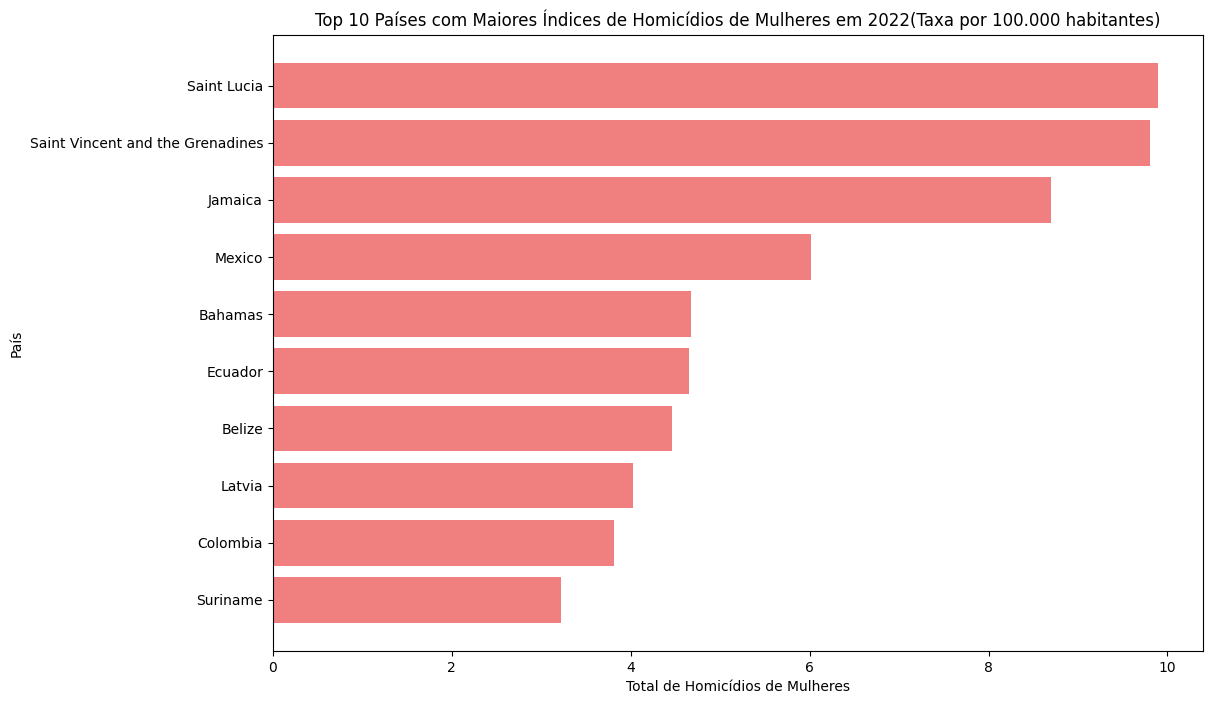

In [ ]:
# Plota o gráfico de barras dos 10 países com os maiores índices de homicídios de mulheres
plt.figure(figsize=(12, 8))
plt.barh(top_10_paises_mulheres['Country'], top_10_paises_mulheres['VALUE'], color='lightcoral')
plt.xlabel('Total de Homicídios de Mulheres')
plt.ylabel('País')
plt.title('Top 10 Países com Maiores Índices de Homicídios de Mulheres em 2022(Taxa por 100.000 habitantes)')
plt.gca().invert_yaxis()
plt.show()

## 3. Quais as regiões com mais homicídios?

#### Para identificar as regiões com mais homicídios, filtramos os dados desde 2013 e mantivemos apenas as contagens absolutas de homicídios. Excluímos estimativas baseadas em dados nacionais e consideramos a totalidade da população. Agrupamos os dados por região e somamos os índices de homicídios, classificando-os de forma decrescente. Os resultados mostraram as regiões com os maiores números de homicídios, visualizados em um gráfico de barras horizontal apresentado logo abaixo.

In [ ]:
homicidios_counts = homicidios[homicidios['Year'] >= 2013]

homicidios_counts = homicidios_counts[homicidios_counts['Unit of measurement'] == 'Counts']

homicidios_counts = homicidios_counts[~homicidios_counts['Source'].isin(['UNODC estimate based on national data'])]

homicidios_counts = homicidios_counts[homicidios_counts['Sex'] == 'Total']

homicidios_counts = homicidios_counts[homicidios_counts['Category']=='Total'] #implica em 'Dimension' == 'Total'

In [ ]:
# Agrupa os dados por região e somar os índices de homicídios
homicidios_por_regiao = homicidios_counts.groupby('Region')['VALUE'].sum().reset_index()

# Classifica as regiões pelos índices totais de homicídios de forma decrescente
homicidios_por_regiao = homicidios_por_regiao.sort_values(by='VALUE', ascending=False)

# Exibe os resultados
print("\nRegiões com mais homicídios:")
homicidios_por_regiao


Regiões com mais homicídios:


,Region,VALUE
1,Americas,1548692.44
2,Asia,1003837.00
0,Africa,402118.00
3,Europe,304663.00
4,Oceania,3772.00


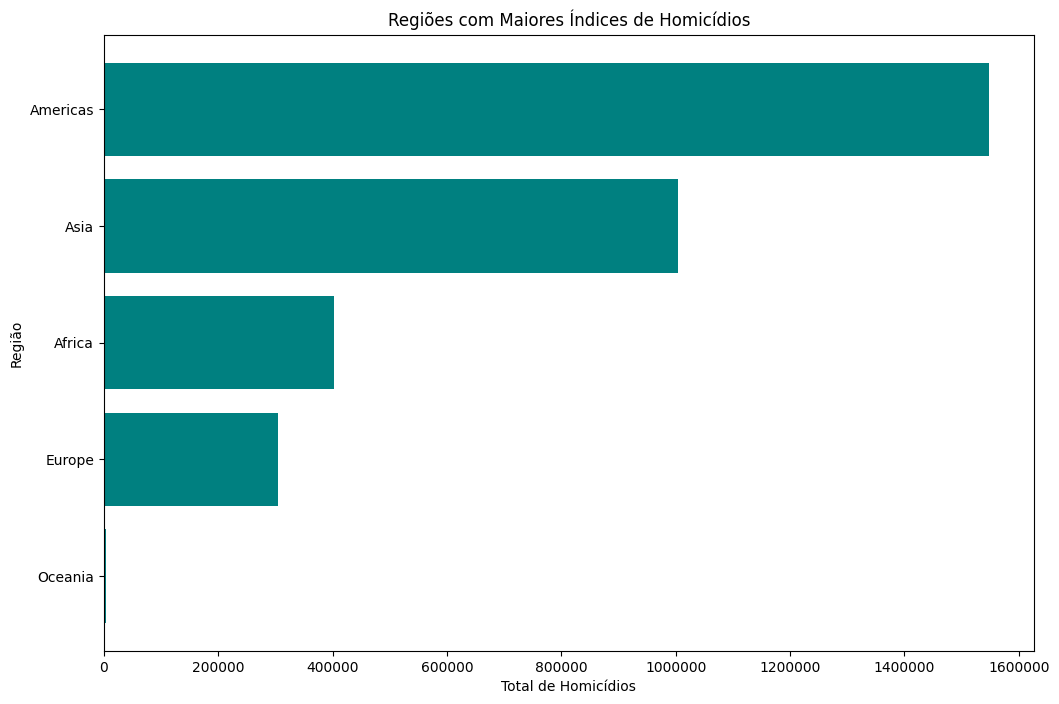

In [ ]:
# Plota gráfico de barras das regiões com mais homicídios
plt.figure(figsize=(12, 8))
plt.barh(homicidios_por_regiao['Region'], homicidios_por_regiao['VALUE'], color='teal')

# Configura o formato dos números no eixo x para exibir como inteiros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

plt.xlabel('Total de Homicídios')
plt.ylabel('Região')
plt.title('Regiões com Maiores Índices de Homicídios')
plt.gca().invert_yaxis()
plt.show()

## 4. Quais países com menor número de homicídios em cada subregião?

#### Para determinar os países com o menor número de homicídios em cada subregião, filtramos os dados para contagens absolutas de homicídios e excluímos estimativas baseadas em dados nacionais. Consideramos a totalidade da população e agrupamos os dados por subregião e país. Identificamos os países com o menor número de homicídios em cada subregião, apresentando abaixo os resultados em um gráfico de barras horizontal que destaca esses países.

In [ ]:
homicidios_counts = homicidios[homicidios['Unit of measurement'] == 'Counts']

homicidios_counts = homicidios_counts[~homicidios_counts['Source'].isin(['UNODC estimate based on national data'])]

homicidios_counts = homicidios_counts[homicidios_counts['Sex'] == 'Total']

homicidios_counts = homicidios_counts[homicidios_counts['Category']=='Total'] #implica em 'Dimension' == 'Total'

In [ ]:
# Agrupa os dados por subregião e somar os índices de homicídios
homicidios_por_subregiao = homicidios_counts.groupby(['Subregion', 'Country'])['VALUE'].sum().reset_index()

id_max_homicidios_por_subregiao = homicidios_por_subregiao.groupby('Subregion')['VALUE'].idxmin()

max_homicidios_por_subregiao = homicidios_por_subregiao.loc[id_max_homicidios_por_subregiao]

# Classifica as subregiões pelos índices totais de homicídios de forma crescente
max_homicidios_por_subregiao = max_homicidios_por_subregiao[['Subregion','Country','VALUE']].sort_values(by='VALUE')

# Exibe os resultados
print("\nRegiões com mais homicídios:")
max_homicidios_por_subregiao



Regiões com mais homicídios:


,Subregion,Country,VALUE
175,Western Europe,Monaco,0.00
133,Sub-Saharan Africa,Djibouti,0.00
118,Southern Europe,Holy See,0.00
50,Latin America and the Caribbean,Montserrat,0.00
95,Polynesia,Tuvalu,0.00
80,Northern Europe,Faroe Islands,0.00
68,Micronesia,Micronesia (Federated States of),1.00
96,South-eastern Asia,Brunei Darussalam,2.00
66,Melanesia,Vanuatu,3.00
76,Northern America,Greenland,18.00


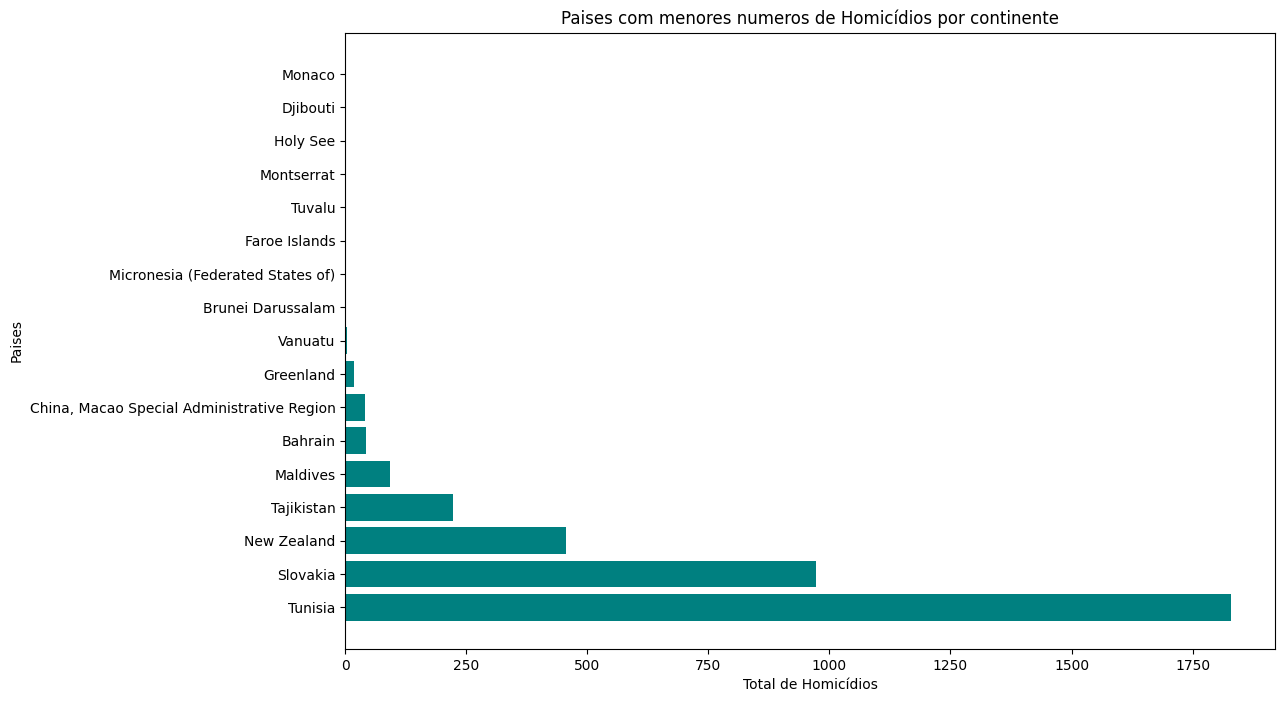

In [ ]:
# Plota gráfico de barras das regiões com mais homicídios
plt.figure(figsize=(12, 8))
plt.barh(max_homicidios_por_subregiao['Country'], max_homicidios_por_subregiao['VALUE'], color='teal')

# Configura o formato dos números no eixo x para exibir como inteiros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

plt.xlabel('Total de Homicídios')
plt.ylabel('Paises')
plt.title('Paises com menores numeros de Homicídios por continente')
plt.gca().invert_yaxis()
plt.show()

## 5. Quais países com menor número de morte de mulheres?

#### Para identificar os países com o menor número de mortes de mulheres, filtramos os dados para contagens absolutas de homicídios de mulheres, excluindo estimativas baseadas em dados nacionais. Consideramos todas as idades e a totalidade da população feminina. Agrupamos os dados por país e somamos os índices de homicídios, classificando-os de forma crescente. Os resultados foram apresentados abaixo em um gráfico de barras horizontal, mostrando os países com os menores índices de homicídios de mulheres.

In [ ]:
homicidios_counts = homicidios[homicidios['Unit of measurement'] == 'Counts']

homicidios_counts = homicidios_counts[~homicidios_counts['Source'].isin(['UNODC estimate based on national data'])]

homicidios_counts = homicidios_counts[homicidios_counts['Sex'] == 'Female']

homicidios_counts = homicidios_counts[homicidios_counts['Age'] == 'Total']

homicidios_counts = homicidios_counts[homicidios_counts['Category']=='Total'] #implica em 'Dimension' == 'Total'

In [ ]:
# Agrupa os dados por país e somar os índices de homicídios de mulheres
homicidios_mulheres_por_pais = homicidios_counts.groupby('Country')['VALUE'].sum().reset_index()

# Classifica os países pelos índices totais de homicídios de mulheres de forma decrescente
homicidios_mulheres_por_pais = homicidios_mulheres_por_pais.sort_values(by='VALUE').head(15)

# Exibe os resultados
print("\nPaises com menor número de morte de mulheres:")
print(homicidios_mulheres_por_pais)


Paises com menor número de morte de mulheres:
                              Country  VALUE
30                     Cayman Islands   0.00
87                             Monaco   0.00
58                           Holy See   0.00
4                             Andorra   0.00
5                            Anguilla   0.00
133          Turks and Caicos Islands   1.00
19                            Bermuda   1.00
9                               Aruba   1.00
129                             Tonga   1.00
86   Micronesia (Federated States of)   1.00
114                             Samoa   2.00
145                           Vanuatu   2.00
3                      American Samoa   2.00
79                      Liechtenstein   4.00
14                            Bahrain   5.00


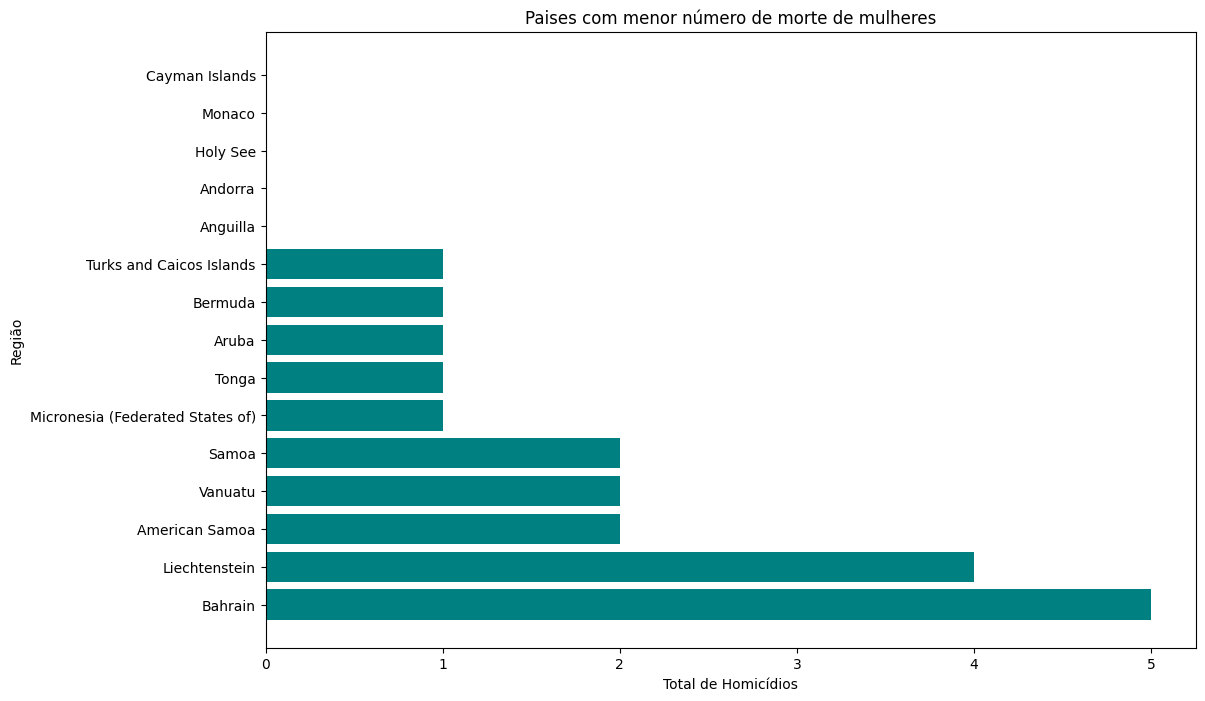

In [ ]:
# Plota gráfico de barras das regiões com mais homicídios
plt.figure(figsize=(12, 8))
plt.barh(homicidios_mulheres_por_pais['Country'], homicidios_mulheres_por_pais['VALUE'], color='teal')
plt.xlabel('Total de Homicídios')
plt.ylabel('Região')
plt.title('Paises com menor número de morte de mulheres')
plt.gca().invert_yaxis()
plt.show()

## 6. Quais as subregiões com maior número de homicídios?

Para determinar as subregiões com o maior número de homicídios, filtramos os dados para contagens absolutas de homicídios desde 2013, excluindo estimativas baseadas em dados nacionais e considerando a totalidade da população

In [ ]:
homicidios_counts = homicidios[homicidios['Unit of measurement'] == 'Counts']
homicidios_counts = homicidios_counts[~homicidios_counts['Source'].isin(['UNODC estimate based on national data'])]
homicidios_counts = homicidios_counts[homicidios_counts['Sex'] == 'Total']
homicidios_counts = homicidios_counts[homicidios_counts['Age'] == 'Total']
homicidios_counts = homicidios_counts[homicidios_counts['Category']=='Total'] #implica em 'Dimension' == 'Total'

Os dados são agrupados por subregião por meio da soma dos índices de homicídios.

In [ ]:
# Agrupa os dados por subregião e soma os valores absolutos de homicídios
homicidios_por_subregiao = homicidios_counts.groupby('Subregion')['VALUE'].sum().reset_index()

# Classifica as subregiões pelos índices totais de homicídios de forma crescente
homicidios_por_subregiao = homicidios_por_subregiao.sort_values(by='VALUE', ascending=False)

print("\nSubregiões com maior número de homicídios:")
homicidios_por_subregiao


Subregiões com maior número de homicídios:


,Subregion,VALUE
4,Latin America and the Caribbean,1361814.44
12,Southern Asia,649824.00
14,Sub-Saharan Africa,376806.00
3,Eastern Europe,239110.00
8,Northern America,186878.00
15,Western Asia,139543.00
2,Eastern Asia,126631.00
11,South-eastern Asia,71986.00
16,Western Europe,26781.00
7,Northern Africa,25312.00


O gráfico a seguir mostra a as subregiões com maiores quantidades absolutas de homicídios

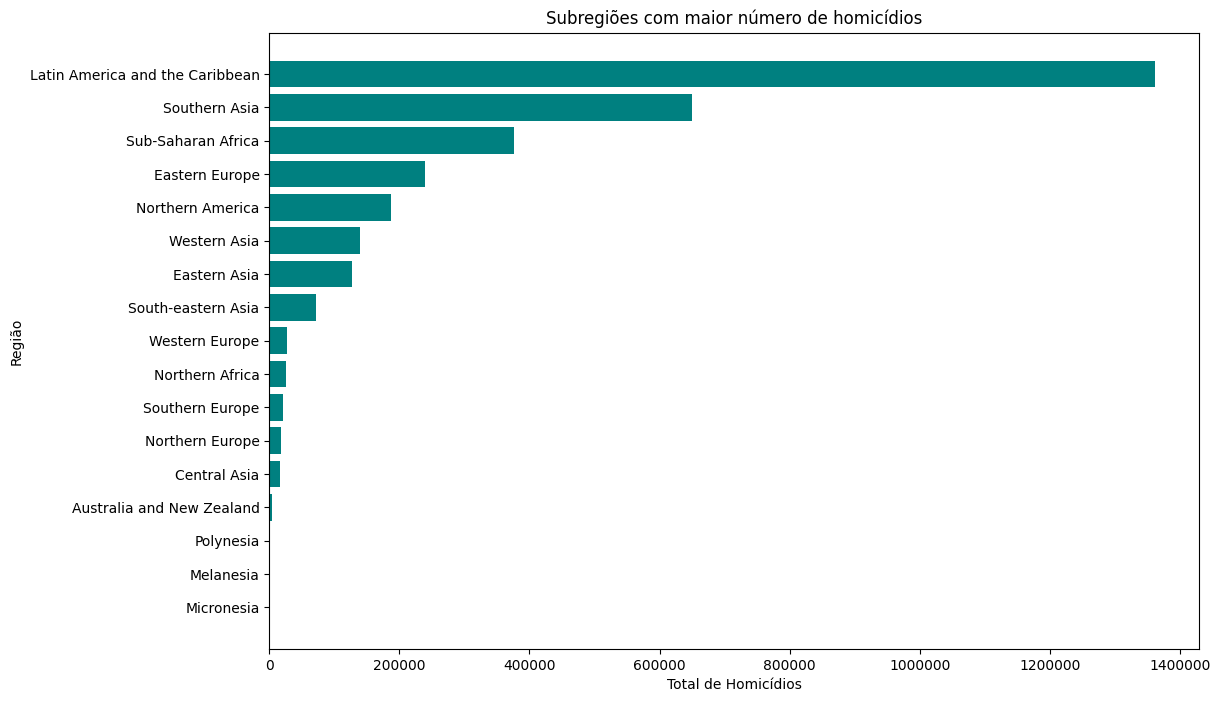

In [ ]:
# Plota gráfico de barras das regiões com mais homicídios
plt.figure(figsize=(12, 8))
plt.barh(homicidios_por_subregiao['Subregion'], homicidios_por_subregiao['VALUE'], color='teal')

# Configura o formato dos números no eixo x para exibir como inteiros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

plt.xlabel('Total de Homicídios')
plt.ylabel('Região')
plt.title('Subregiões com maior número de homicídios')
plt.gca().invert_yaxis()
plt.show()

## 7. Identifique o país com maior número de homicídios em cada continente em 2020

Para identificar os países com o maior número de homicídios em cada continente em 2020, filtramos os dados para esse ano específico e selecionamos somente as bases de dados com valores absolutos, e não de estimativas.

Como se está procurando o número absoluto de homicídios de um país, é feito a filtragem por essa medida e também é selecionadom somente os valores absolutos com números de homicídios em todas as idades, sexo e categoria específica.

In [ ]:
dados_2020 = homicidios[homicidios['Year'] == 2020]
dados_2020 = dados_2020[~dados_2020['Source'].isin(['UNODC estimate based on national data'])]
dados_2020 = dados_2020[dados_2020['Unit of measurement'] == 'Counts']
dados_2020 = dados_2020[dados_2020['Age'] == 'Total']
dados_2020 = dados_2020[dados_2020['Sex'] == 'Total']
dados_2020 = dados_2020[dados_2020['Category']=='Total'] #implica em 'Dimension' == 'Total'
dados_2020.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
5146,AFG,Afghanistan,Asia,Southern Asia,Victims of intentional homicide,Total,Total,Total,Total,2020,Counts,2570.00,NSO
5147,ALB,Albania,Europe,Southern Europe,Victims of intentional homicide,Total,Total,Total,Total,2020,Counts,61.00,MD/CTS/GSH 2023 Revision/NSO
5148,AND,Andorra,Europe,Southern Europe,Victims of intentional homicide,Total,Total,Total,Total,2020,Counts,2.00,Interpol/CTS
5149,ARE,United Arab Emirates,Asia,Western Asia,Victims of intentional homicide,Total,Total,Total,Total,2020,Counts,65.00,CTS
5150,ARG,Argentina,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2020,Counts,2418.00,MoS/CTS


Os dados de homicídio de cada país são agrupados por meio de uma soma. Com isso, são selecionados os países com mais homicídios da região.

In [ ]:
# É feito a soma dos índices de homicídio agrupando pelo país
max_homicidios_por_paises = dados_2020.groupby(['Region','Country'])['VALUE'].sum().reset_index()

# E selecionado os países com mais homicídios por região
id_max_homicidios_por_paises = max_homicidios_por_paises.groupby('Region')['VALUE'].idxmax()
max_homicidios_por_regiao = max_homicidios_por_paises.loc[id_max_homicidios_por_paises]
max_homicidios_por_regiao

,Region,Country,VALUE
13,Africa,South Africa,19972.00
25,Americas,Brazil,47722.00
64,Asia,India,53294.00
118,Europe,Russian Federation,18460.00
129,Oceania,Australia,307.00


Por fim, é realizado um *plot* dos dados identificando os países com maior número de homicídios por continente.

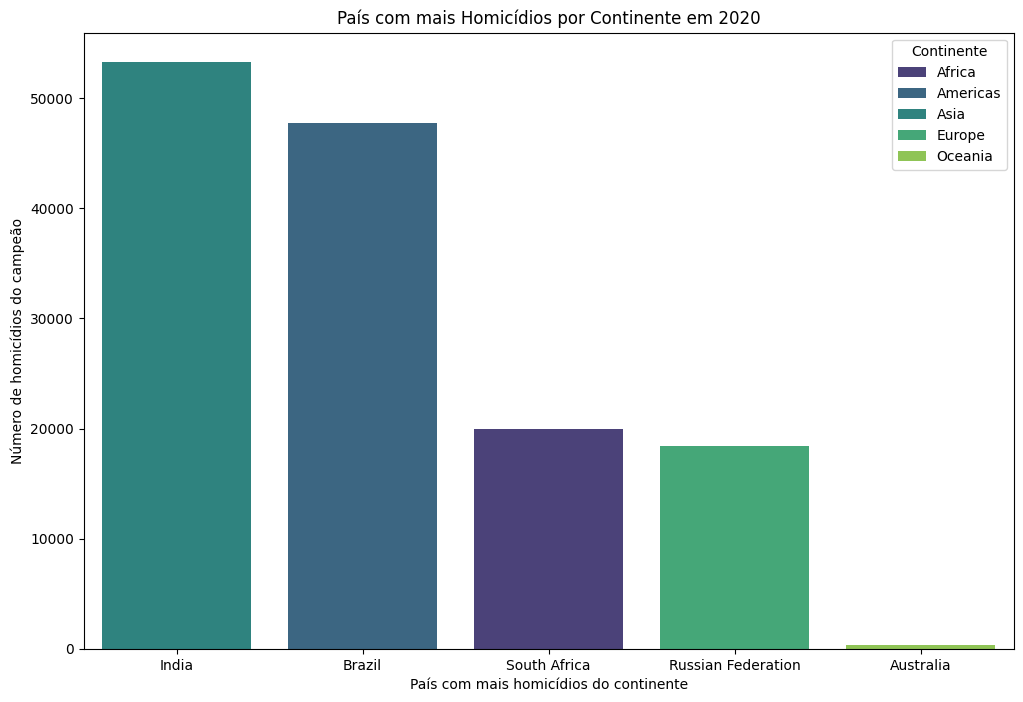

In [ ]:
plt.figure(figsize=(12, 8))

dados_ordenados = max_homicidios_por_regiao.sort_values('VALUE', ascending=False)['Country']
barplot = sns.barplot(x='Country', y='VALUE', hue='Region', dodge=False, data=max_homicidios_por_regiao, palette='viridis', order=dados_ordenados)

plt.title('País com mais homicídios por continente em 2020')
plt.xlabel('País com mais homicídios do continente')
plt.ylabel('Número de homicídios do campeão')
plt.legend(title='Continente', loc='upper right')
plt.show()

## 8. Qual o país com mais violento para as mulheres em 2021?

#### Para determinar o país mais violento para as mulheres em 2021, filtramos os dados para esse ano específico e excluímos estimativas baseadas em dados nacionais. Consideramos as contagens absolutas de homicídios de mulheres de todas as idades. Agrupamos os dados por país e somamos os índices de homicídios, classificando-os de forma decrescente. O país com o maior número de homicídios de mulheres em 2021 foi identificado e apresentado em seguida.

In [ ]:
dados_2021 = homicidios[homicidios['Year'] == 2021]

dados_2021 = dados_2021[~dados_2021['Source'].isin(['UNODC estimate based on national data'])]

dados_2021 = dados_2021[dados_2021['Unit of measurement'] == 'Counts']

dados_2021 = dados_2021[dados_2021['Age'] == 'Total']

dados_2021 = dados_2021[dados_2021['Sex'] == 'Female']

dados_2021 = dados_2021[dados_2021['Category']=='Total'] #implica em 'Dimension' == 'Total'

In [ ]:
# Agrupa os dados por subregião e somar os índices de homicídios
homicidios_mulheres_2021 = dados_2021.groupby('Country')['VALUE'].sum().reset_index()
homicidios_mulheres_2021.sort_values(by='VALUE', ascending=False).head(1)

,Country,VALUE
46,India,17012.38


## 9. Qual o país com maior valor de 'indicador: Victims of intentional homicide'?

#### Para identificar o país com o maior valor do indicador "Victims of intentional homicide", filtramos os dados para contagens absolutas de homicídios, excluindo estimativas baseadas em dados nacionais. Consideramos a totalidade da população e o indicador específico. Agrupamos os dados por país e somamos os índices de homicídios, classificando-os de forma decrescente. O país com o maior valor desse indicador foi identificado e apresentado em seguida.

In [ ]:
dados_indicador = homicidios[homicidios['Unit of measurement'] == 'Counts']

dados_indicador = dados_indicador[~dados_indicador['Source'].isin(['UNODC estimate based on national data'])]

dados_indicador = dados_indicador[dados_indicador['Age'] == 'Total']

dados_indicador = dados_indicador[dados_indicador['Sex'] == 'Total']

dados_indicador = dados_indicador[dados_indicador['Category']=='Total'] #implica em 'Dimension' == 'Total'

dados_indicador = dados_indicador[dados_indicador['Indicator']=='Victims of intentional homicide']

In [ ]:
homicidios_indicador = dados_indicador.groupby('Country')['VALUE'].sum().reset_index()

homicidios_indicador.sort_values(by='VALUE', ascending=False).head(1)


,Country,VALUE
26,Brazil,493095.00


##10. Qual a média de homicídios no Brasil nos últimos 10 anos?

#### Para calcular a média de homicídios no Brasil nos últimos 10 anos, filtramos os dados para contagens absolutas de homicídios, excluindo estimativas baseadas em dados nacionais. Consideramos a totalidade da população e os dados específicos do Brasil. Filtramos os dados para os últimos 10 anos e calculamos a média dos índices de homicídios. A média de homicídios no Brasil durante esse período foi calculada e apresentada.

In [ ]:
dados_homicidios_brasil = homicidios[homicidios['Unit of measurement'] == 'Counts']

dados_homicidios_brasil = dados_homicidios_brasil[~dados_homicidios_brasil['Source'].isin(['UNODC estimate based on national data'])]

dados_homicidios_brasil = dados_homicidios_brasil[dados_homicidios_brasil['Age'] == 'Total']

dados_homicidios_brasil = dados_homicidios_brasil[dados_homicidios_brasil['Sex'] == 'Total']

dados_homicidios_brasil = dados_homicidios_brasil[dados_homicidios_brasil['Category']=='Total'] #implica em 'Dimension' == 'Total'


In [ ]:
# Filtra os dados para o Brasil
dados_brasil = dados_homicidios_brasil[dados_homicidios_brasil['Country'] == 'Brazil']

# Filtra os dados para os últimos 10 anos
dados_brasil_10_anos = dados_brasil[dados_brasil['Year'] >= 2013]

# Calcula a média de homicídios
media_homicidios_brasil = dados_brasil_10_anos['VALUE'].mean()

print(f"\nA média de homicídios no Brasil nos últimos 10 anos é: {media_homicidios_brasil:.2f}")



A média de homicídios no Brasil nos últimos 10 anos é: 41149.83
